Imports

In [8]:
import os
import warnings
from pathlib import Path
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
print(os.listdir("./input"))
warnings.filterwarnings("ignore")

['DATASET.md', 'wm811k-wafer-map']


Read Pickle

In [9]:
df = pd.read_pickle("./input/wm811k-wafer-map/LSWMD.pkl")
print(df.info())
display(df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB
None


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]


In [10]:
f_squeeze = lambda x: str(np.squeeze(x))
df["failureType"] = df["failureType"].map(f_squeeze)
df["trianTestLabel"] = df["trianTestLabel"].map(f_squeeze)
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,none
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,none


In [11]:
eliminate_list = ['[]']
df_with_label = df.query(f"failureType not in {eliminate_list}")
print(f"{len(df_with_label)}")
print("Label list: ", df_with_label["failureType"].unique())
df_with_label.head(3)

172950
Label list:  ['none' 'Loc' 'Edge-Loc' 'Center' 'Edge-Ring' 'Scratch' 'Random'
 'Near-full' 'Donut']


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none


In [12]:
class2idx = {
    'none': 0,
    'Loc': 1,
    'Edge-Loc': 2,
    'Center': 3,
    'Edge-Ring': 4, 
    'Scratch': 5,
    'Random': 6, 
    'Near-full': 7,
    'Donut': 8
}
idx2class = {v: k for k, v in class2idx.items()}

class2idx_json_path = "./config_class2idx.json"
with open(class2idx_json_path, "w") as f:
    json.dump(class2idx, f)

df_with_label["encoded_labels"] = df_with_label["failureType"].replace(class2idx)

print(df_with_label["encoded_labels"].value_counts())
df_with_label.reset_index(inplace=True, drop=True)
df_with_label.to_pickle("./LSWMD_25519.pkl")  
df_with_label.head(3)

encoded_labels
0    147431
4      9680
2      5189
3      4294
1      3593
5      1193
6       866
8       555
7       149
Name: count, dtype: int64


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,encoded_labels
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none,0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none,0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none,0


In [13]:
train_data_length = int(0.8*len(df_with_label)) 
df_with_label = df_with_label.sample(frac=1, random_state=2)
df_train, df_test = df_with_label[:train_data_length], df_with_label[train_data_length:]
df_train.reset_index(inplace=True, drop=True)
df_test.reset_index(inplace=True, drop=True)

train_data_length = int(0.75*len(df_train))
df_train, df_val = df_train[:train_data_length], df_train[train_data_length:]
print(f"training: {len(df_train)}, val: {len(df_val)}, test: {len(df_test)}, (all: {len(df_with_label)})")

# This aims to save the data into your environment.
df_train.to_pickle("dataset_train.pickle")
df_val.to_pickle("dataset_val.pickle")
df_test.to_pickle("dataset_test.pickle")
print(os.listdir())

training: 103770, val: 34590, test: 34590, (all: 172950)
['dataset_test.pickle', 'README.md', 'LICENSE', 'temp.py', 'input', 'LSWMD_25519.pkl', '.gitignore', 'dataset_val.pickle', 'config_class2idx.json', 'main.ipynb', 'dataset_train.pickle', '.git']


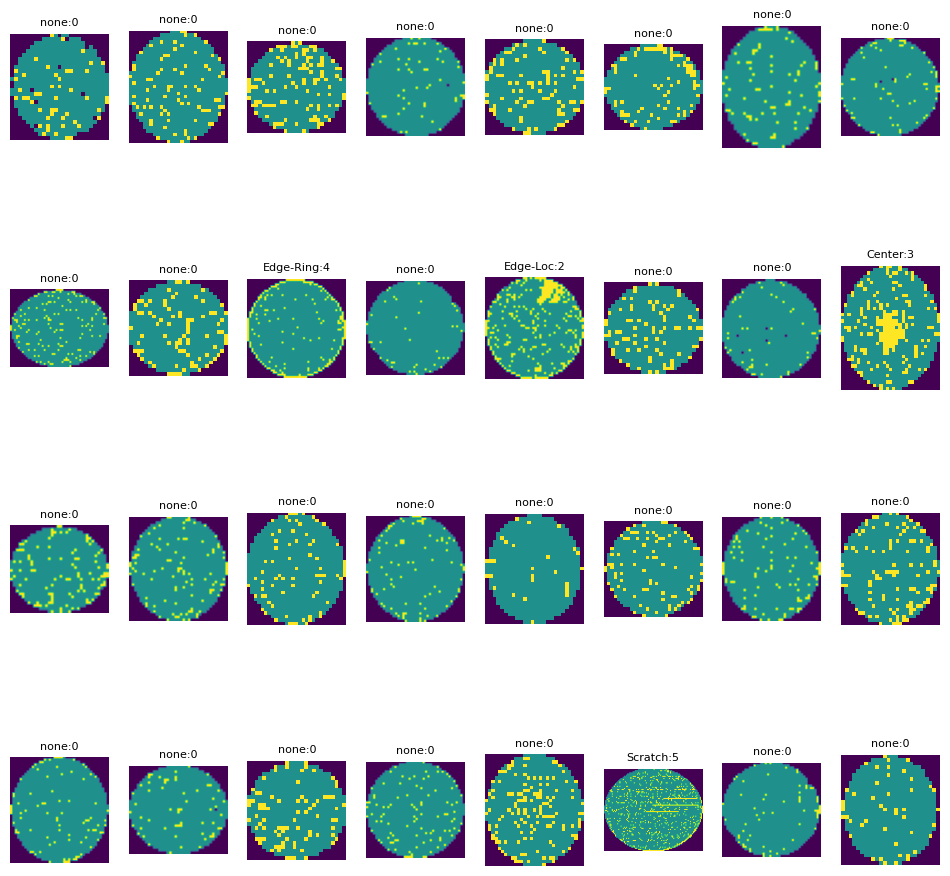

In [14]:
idx2class = {v: k for k, v in class2idx.items()}
batch_size = 32
plt.figure(figsize=(12,12))
for i in range(batch_size):
    ax = plt.subplot(4, 8, i+1)
    ax.axis("off")
    ax.imshow(df_train["waferMap"][i])
    ax.set_title(f'{idx2class[df_train["encoded_labels"][i]]}:{str(df_train["encoded_labels"][i])}', fontsize=8)